In [1]:
# Importamos las librerías que necesitamos

# Librerías de extracción de datos
# -----------------------------------------------------------------------

%load_ext autoreload
%autoreload 2

# Visualizaciones
# -----------------------------------------------------------------------
import seaborn as sns
import matplotlib.pyplot as plt
import plotly_express as px

# Importaciones:
# Beautifulsoup
from bs4 import BeautifulSoup

import sys
sys.path.append('../src')
import funciones as f
import soporte_prep as sp

# Requests
import requests

import pandas as pd
import numpy as np

from time import sleep

# Importar librerías para automatización de navegadores web con Selenium
# -----------------------------------------------------------------------
from selenium import webdriver  # Selenium es una herramienta para automatizar la interacción con navegadores web.
from webdriver_manager.chrome import ChromeDriverManager  # ChromeDriverManager gestiona la instalación del controlador de Chrome.
from selenium.webdriver.common.keys import Keys  # Keys es útil para simular eventos de teclado en Selenium.
from selenium.webdriver.support.ui import Select  # Select se utiliza para interactuar con elementos <select> en páginas web.
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.common.exceptions import NoSuchElementException # Excepciones comunes de selenium que nos podemos encontrar 

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)

In [2]:
driver = webdriver.Chrome()
url_accidentes = "https://www.one.gob.do/datos-y-estadisticas/"
driver.get(url_accidentes)
driver.maximize_window()

sleep(1)  # Esperar un segundo entre cada scroll

try: 
    driver.find_element("xpath", '/html/body/div[7]/section/div/ul/li[2]/a').click()
except:
    print('No encuentro el botón')

sleep(2)

for i in range(2):
    try:
        driver.execute_script("window.scrollBy(0, 500);")  # Desplazarse 1000 píxeles hacia abajo
    except:
        print('No he podido descender')

try: 
    driver.find_element("xpath", '/html/body/div[7]/section/div/div[3]/div[2]/div/div[2]/div[2]/div/div/div[2]/header/div[2]').click()
except:
    print('No encuentro el botón para ampliar')
sleep(2)
try: 
    driver.find_element("xpath", '/html/body/div[7]/section/div/div[3]/div[2]/div/div[2]/div[2]/div/div/div[2]/div/header/div[1]').click()
except:
    print('No encuentro el botón para abrir pestañas')
sleep(2)
try:
    driver.execute_script("window.scrollBy(0, 700);")
except:
    print('No he podido descender')

try: 
    driver.find_element("xpath", '/html/body/div[7]/section/div/div[3]/div[2]/div/div[2]/div[2]/div/div/div[2]/div/div/div/div/div[2]/div/table/tbody/tr[1]/td/a').click()
except:
    print('No encuentro el botón para descargar') #descargo el libro de códigos de accidentes de tráfico

try: 
    driver.find_element("xpath", '/html/body/div[7]/section/div/div[3]/div[2]/div/div[2]/div[2]/div/div/div[2]/div/div/div/div/div[2]/div/table/tbody/tr[8]/td/a').click()
except:
    print('No encuentro el botón para descargar') #descargo los accidentes de tráfico

    

No encuentro el botón para descargar


# Tablas de Bases de datos

### Tabla principal

In [3]:
df_principal = pd.read_csv("C:\\Users\\DELL\\Downloads\\BD_ACCIDENTES DE TRANSITO_2007-2023.csv", sep=';')

### Definir lo que significa cada columna

- DIASEMANA: día de la semana.
- MESOCU: mes.
- ANOOCU: año de ocurrencia.
- RHORA: rango de hora.
- REGION: region donde ocurrió.
- PROVINCIA: provincia donde ocurrió.
- TVIA: tipo de vía donde ocurrió.
- TIPOACCIDENTE: tipo de accidente.
- SALDOTRAG: salgo trágico.
- MEDIOTRANS: medio de transporte.
- VEHICHOQUE: vehículo con el que chocó.


In [4]:
df_principal.head()

,DIASEMANA,MESOCU,ANOOCU,RHORA,REGION,PROVINCIA,TVIA,TIPOACCIDENTE,SALDOTRAG,MEDIOTRANS,VEHICHOQUE,VEHICUVOLC,VEHICUATRO,VEHICAIDA,VEHIDESLI,ESTRECON,APLASTAM,OTROACCIDEN
0,7,2,2007,2,10,1,4,3,1,25,26,,99,,,,,
1,2,2,2007,1,10,1,2,3,1,25,26,,99,,,,,
2,3,2,2007,1,10,1,2,3,1,25,26,,99,,,,,
3,3,2,2007,11,10,1,2,3,1,25,26,,99,,,,,
4,5,2,2007,10,10,1,2,3,1,25,26,,99,,,,,


In [5]:
# Crear la columna de fecha combinando año, mes y día
df_principal['FECHA'] = pd.to_datetime(df_principal['ANOOCU'].astype(str) + '-' + 
                                    df_principal['MESOCU'].astype(str) + '-' + 
                                    df_principal['DIASEMANA'].astype(str), 
                                    format='%Y-%m-%d')

df_principal.head()

,DIASEMANA,MESOCU,ANOOCU,RHORA,REGION,PROVINCIA,TVIA,TIPOACCIDENTE,SALDOTRAG,MEDIOTRANS,VEHICHOQUE,VEHICUVOLC,VEHICUATRO,VEHICAIDA,VEHIDESLI,ESTRECON,APLASTAM,OTROACCIDEN,FECHA
0,7,2,2007,2,10,1,4,3,1,25,26,,99,,,,,,2007-02-07
1,2,2,2007,1,10,1,2,3,1,25,26,,99,,,,,,2007-02-02
2,3,2,2007,1,10,1,2,3,1,25,26,,99,,,,,,2007-02-03
3,3,2,2007,11,10,1,2,3,1,25,26,,99,,,,,,2007-02-03
4,5,2,2007,10,10,1,2,3,1,25,26,,99,,,,,,2007-02-05


In [6]:
df_principal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28312 entries, 0 to 28311
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   DIASEMANA      28312 non-null  int64         
 1   MESOCU         28312 non-null  int64         
 2   ANOOCU         28312 non-null  int64         
 3   RHORA          28312 non-null  int64         
 4   REGION         28312 non-null  int64         
 5   PROVINCIA      28312 non-null  int64         
 6   TVIA           28312 non-null  int64         
 7   TIPOACCIDENTE  28312 non-null  int64         
 8   SALDOTRAG      28312 non-null  int64         
 9   MEDIOTRANS     28312 non-null  int64         
 10  VEHICHOQUE     28312 non-null  object        
 11  VEHICUVOLC     28312 non-null  object        
 12  VEHICUATRO     28312 non-null  object        
 13  VEHICAIDA      28312 non-null  object        
 14  VEHIDESLI      28312 non-null  object        
 15  ESTRECON       2831

In [7]:
df_llena = df_principal.copy()

In [8]:
df_llena.head()

,DIASEMANA,MESOCU,ANOOCU,RHORA,REGION,PROVINCIA,TVIA,TIPOACCIDENTE,SALDOTRAG,MEDIOTRANS,VEHICHOQUE,VEHICUVOLC,VEHICUATRO,VEHICAIDA,VEHIDESLI,ESTRECON,APLASTAM,OTROACCIDEN,FECHA
0,7,2,2007,2,10,1,4,3,1,25,26,,99,,,,,,2007-02-07
1,2,2,2007,1,10,1,2,3,1,25,26,,99,,,,,,2007-02-02
2,3,2,2007,1,10,1,2,3,1,25,26,,99,,,,,,2007-02-03
3,3,2,2007,11,10,1,2,3,1,25,26,,99,,,,,,2007-02-03
4,5,2,2007,10,10,1,2,3,1,25,26,,99,,,,,,2007-02-05


### Tablas secundarias

In [9]:
driver = webdriver.Chrome()
url_accidentes = "file:///C:/Users/DELL/Downloads/Libro%20de%20c%C3%B3digo%20accidentes%20de%20tr%C3%A1nsito%202007-2023%20(1).htm"
driver.get(url_accidentes)
driver.maximize_window()

sleep(1)  # Esperar un segundo entre cada scroll

sopa_accidentes = BeautifulSoup(driver.page_source)
lista_tablas = sopa_accidentes.findAll('div', {'class': 'itemBody'})
lista_tablas[0]

<div class="itemBody">
<table aria-label="DIASEMANA" class="Default PivotTable" data-col-labels="Valor" data-collabelheight="1" data-column-dimension="Valores;" data-decimal-char="." data-layer-dimension="" data-lookname="Default" data-maxcolwidth="72" data-numcols="1" data-numrows="9" data-row-dimension="Atributos;" data-row-labels="Atributos estándar Etiqueta;Valores válidos 1; 2; 3; 4; 5; 6; 7; 9" data-rowlabels="Corner" data-rowlabelwidth="2" role="complementary" style="width:279px" summary="DIASEMANA, tabla, 1 niveles de cabeceras de columna y 2 niveles de cabeceras de fila, tabla con 3 columnas y 11 filas">
<caption class="title" style="width:279px">DIASEMANA<span class="details">DIASEMANA, tabla, 1 niveles de cabeceras de columna y 2 niveles de cabeceras de fila, tabla con 3 columnas y 11 filas</span></caption>
<tbody class="PivotBody defaultLayer innerFrameBd">
<tr>
<td class="cornerLabels" colspan="2"> </td>
<td class="columnLabels dataAreaLeft vCC role3">Valor</td>
</tr>
<tr>

In [10]:
dataframes = []

for i, tabla in enumerate(lista_tablas):
    rows = tabla.find_all('tr')

    data = []
    for row in rows:
        cells = row.find_all('td')
        data.append([cell.get_text(strip=True) for cell in cells if cell.get_text(strip=True)])

    df = pd.DataFrame(data)

    dataframes.append(df)

print(f"Se generaron {len(dataframes)} DataFrames.")

Se generaron 18 DataFrames.


In [11]:
dataframes[1]

,0,1,2
0,Valor,None,None
1,Atributos estándar,Etiqueta,Mes
2,Valores válidos,1,Enero
3,2,Febrero,None
4,3,Marzo,None
5,4,Abril,None
6,5,Mayo,None
7,6,Junio,None
8,7,Julio,None
9,8,Agosto,None


- Guardo los DF

In [12]:
df_diasem = dataframes[0]
df_mes = dataframes[1]
df_rhora = dataframes[3]
df_region = dataframes[4]
df_provincia = dataframes[5]
df_tipovia = dataframes[6]
df_accidente = dataframes[7]
df_mediot = dataframes[9]
df_choque = dataframes[10]

In [13]:
dataframes_list = [
    df_region, df_provincia, df_diasem, df_mes, df_rhora,
    df_tipovia, df_accidente,
    df_mediot, df_choque
]

for i, df in enumerate(dataframes_list):
    # Recortar las filas a partir de la fila 3
    df = df.iloc[2:]
    
    # Mover el valor de la columna 2 a la columna 1 en la primera fila
    df.iloc[0, 1] = df.iloc[0, 2]
    df.iloc[0,0] = 1
    
    # Seleccionar solo la columna 1
    df = df[[0,1]]
    
    # Reiniciar el índice
    df.reset_index(drop=True, inplace=True)
    df = df[:-1]
    df.columns = ['Valor', 'Significado']
    df['Valor'] = df['Valor'].astype('int64')
    # Guardar el DataFrame transformado de nuevo en la lista
    dataframes_list[i] = df

# Asignar los DataFrames de vuelta a sus variables
df_region, df_provincia, df_diasem, df_mes, df_rhora, df_tipovia, df_accidente, df_mediot, df_choque = dataframes_list


In [14]:
df_llena.head()

,DIASEMANA,MESOCU,ANOOCU,RHORA,REGION,PROVINCIA,TVIA,TIPOACCIDENTE,SALDOTRAG,MEDIOTRANS,VEHICHOQUE,VEHICUVOLC,VEHICUATRO,VEHICAIDA,VEHIDESLI,ESTRECON,APLASTAM,OTROACCIDEN,FECHA
0,7,2,2007,2,10,1,4,3,1,25,26,,99,,,,,,2007-02-07
1,2,2,2007,1,10,1,2,3,1,25,26,,99,,,,,,2007-02-02
2,3,2,2007,1,10,1,2,3,1,25,26,,99,,,,,,2007-02-03
3,3,2,2007,11,10,1,2,3,1,25,26,,99,,,,,,2007-02-03
4,5,2,2007,10,10,1,2,3,1,25,26,,99,,,,,,2007-02-05


In [15]:
df_llena.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28312 entries, 0 to 28311
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   DIASEMANA      28312 non-null  int64         
 1   MESOCU         28312 non-null  int64         
 2   ANOOCU         28312 non-null  int64         
 3   RHORA          28312 non-null  int64         
 4   REGION         28312 non-null  int64         
 5   PROVINCIA      28312 non-null  int64         
 6   TVIA           28312 non-null  int64         
 7   TIPOACCIDENTE  28312 non-null  int64         
 8   SALDOTRAG      28312 non-null  int64         
 9   MEDIOTRANS     28312 non-null  int64         
 10  VEHICHOQUE     28312 non-null  object        
 11  VEHICUVOLC     28312 non-null  object        
 12  VEHICUATRO     28312 non-null  object        
 13  VEHICAIDA      28312 non-null  object        
 14  VEHIDESLI      28312 non-null  object        
 15  ESTRECON       2831

In [16]:
# lista de tuplas con las columnas a mapear, el df correspondiente y la columna única
mapeos = [
    ('TIPOACCIDENTE', df_accidente), ('REGION', df_region), ('PROVINCIA', df_provincia), ('DIASEMANA', df_diasem), ('MESOCU', df_mes), ('RHORA', df_rhora),
    ('TVIA', df_tipovia),('MEDIOTRANS', df_mediot),
]

for columna, df_mapeado in mapeos:
    mapeo = dict(zip(df_mapeado['Valor'], df_mapeado['Significado']))
    valores = df_llena[columna].unique()
    mapeo_filtrado = {k: v for k, v in mapeo.items() if k in valores}
    df_llena[columna] = df_llena[columna].map(mapeo_filtrado)

In [17]:
df_llena.head()

,DIASEMANA,MESOCU,ANOOCU,RHORA,REGION,PROVINCIA,TVIA,TIPOACCIDENTE,SALDOTRAG,MEDIOTRANS,VEHICHOQUE,VEHICUVOLC,VEHICUATRO,VEHICAIDA,VEHIDESLI,ESTRECON,APLASTAM,OTROACCIDEN,FECHA
0,Domingo,Febrero,2007,02:01-04:00,Región Ozama,Distrito Nacional,Carretera,Atropellamiento,1,Peatón atropellado,26,,99,,,,,,2007-02-07
1,Martes,Febrero,2007,00:01-02:00,Región Ozama,Distrito Nacional,Avenida,Atropellamiento,1,Peatón atropellado,26,,99,,,,,,2007-02-02
2,Miércoles,Febrero,2007,00:01-02:00,Región Ozama,Distrito Nacional,Avenida,Atropellamiento,1,Peatón atropellado,26,,99,,,,,,2007-02-03
3,Miércoles,Febrero,2007,20:01-22:00,Región Ozama,Distrito Nacional,Avenida,Atropellamiento,1,Peatón atropellado,26,,99,,,,,,2007-02-03
4,Viernes,Febrero,2007,18:01-20:00,Región Ozama,Distrito Nacional,Avenida,Atropellamiento,1,Peatón atropellado,26,,99,,,,,,2007-02-05


In [18]:
# muevo la última columna al principio
ultima_columna = df_llena.columns[-1]  # busco el nombre de la última columna
columnas = [ultima_columna] + [col for col in df_llena.columns if col != ultima_columna] # cambio el orden
df_llena = df_llena[columnas]

In [19]:
df_llena.head()

,FECHA,DIASEMANA,MESOCU,ANOOCU,RHORA,REGION,PROVINCIA,TVIA,TIPOACCIDENTE,SALDOTRAG,MEDIOTRANS,VEHICHOQUE,VEHICUVOLC,VEHICUATRO,VEHICAIDA,VEHIDESLI,ESTRECON,APLASTAM,OTROACCIDEN
0,2007-02-07,Domingo,Febrero,2007,02:01-04:00,Región Ozama,Distrito Nacional,Carretera,Atropellamiento,1,Peatón atropellado,26,,99,,,,,
1,2007-02-02,Martes,Febrero,2007,00:01-02:00,Región Ozama,Distrito Nacional,Avenida,Atropellamiento,1,Peatón atropellado,26,,99,,,,,
2,2007-02-03,Miércoles,Febrero,2007,00:01-02:00,Región Ozama,Distrito Nacional,Avenida,Atropellamiento,1,Peatón atropellado,26,,99,,,,,
3,2007-02-03,Miércoles,Febrero,2007,20:01-22:00,Región Ozama,Distrito Nacional,Avenida,Atropellamiento,1,Peatón atropellado,26,,99,,,,,
4,2007-02-05,Viernes,Febrero,2007,18:01-20:00,Región Ozama,Distrito Nacional,Avenida,Atropellamiento,1,Peatón atropellado,26,,99,,,,,


In [20]:
df_llena = df_llena.iloc[:,0:11]

### Guardar todos los csv

In [21]:
df_llena.head()

,FECHA,DIASEMANA,MESOCU,ANOOCU,RHORA,REGION,PROVINCIA,TVIA,TIPOACCIDENTE,SALDOTRAG,MEDIOTRANS
0,2007-02-07,Domingo,Febrero,2007,02:01-04:00,Región Ozama,Distrito Nacional,Carretera,Atropellamiento,1,Peatón atropellado
1,2007-02-02,Martes,Febrero,2007,00:01-02:00,Región Ozama,Distrito Nacional,Avenida,Atropellamiento,1,Peatón atropellado
2,2007-02-03,Miércoles,Febrero,2007,00:01-02:00,Región Ozama,Distrito Nacional,Avenida,Atropellamiento,1,Peatón atropellado
3,2007-02-03,Miércoles,Febrero,2007,20:01-22:00,Región Ozama,Distrito Nacional,Avenida,Atropellamiento,1,Peatón atropellado
4,2007-02-05,Viernes,Febrero,2007,18:01-20:00,Región Ozama,Distrito Nacional,Avenida,Atropellamiento,1,Peatón atropellado


In [22]:
df_diasem.to_csv('../Datos/datos_accidentes/df_diasem.csv')
df_mes.to_csv('../Datos/datos_accidentes/df_mes.csv')
df_rhora.to_csv('../Datos/datos_accidentes/df_rhora.csv')
df_region.to_csv('../Datos/datos_accidentes/df_region.csv')
df_provincia.to_csv('../Datos/datos_accidentes/df_provincia.csv')
df_tipovia.to_csv('../Datos/datos_accidentes/df_tipovia.csv')
df_accidente.to_csv('../Datos/datos_accidentes/df_accidente.csv')
df_mediot.to_csv('../Datos/datos_accidentes/df_mediot.csv')
df_choque.to_csv('../Datos/datos_accidentes/df_choque.csv')

## EDA

El data frame de accidentes nos arroja las siguientes observaciones:
- 28312 filas por 11 columnas
- 270 duplicados, lo cual equivale a menos de un 1% (0.95). Al eliminarlos, restan 28042 datos
- Los datos van desde el 2007 hasta el 2023, divididos entre los 12 meses del año
    - El año con más accidentes fue el 2010 con 1928, seguido del 2019 y 2016 en el top 3
    - El mes con más accidentes fue diciembre con 2861, seguido de enero y marzo
    - El día más accidentado fue el domingo, seguido de sábado y lunes
    - Las horas más accidentadas ocurren entre 18-20, 20-22 y 16-18. Lo que demuestra un rango alarmante pero a la vez lógico porque estos suelen sus horarios de mucho movimiento vehicular.
    - Las regiones que tienen más accidentes son Ozama, Cibao Norte y Cibao Sur
    - Las provincias con más accidentes son Santo Domingo, Santiago y San Cristóbal
    - El tipo de vía más accidentada es la Carretera, seguido de la calle y avenida. Aunque la autopista no se queda muy por detrás.
    - El tipo de accidente predomina ser choque, seguido de atropellamiento y deslizamiento.
    - El medio de transporte que predomina en los accidentes es la motocicleta, seguido se encuentra el peatón atropellado para ocupar el tercer lugar el automóvil.
    
Podemos ver que el 75% de los accidentes llega a tener 1 persona, trágicamente involucrada en este. Los demás pueden ir entre 2 hasta 18.

In [23]:
f.exploracion_dataframe(df_llena)

El número de datos es 28312 y el de columnas es 11

 ..................... 

Los duplicados que tenemos en el conjunto de datos son: 270

 ..................... 

Los nulos que tenemos en el conjunto de datos son:


,%_nulos



 ..................... 

Los tipos de las columnas son:


,tipo_dato
FECHA,datetime64[ns]
DIASEMANA,object
MESOCU,object
ANOOCU,int64
RHORA,object
REGION,object
PROVINCIA,object
TVIA,object
TIPOACCIDENTE,object
SALDOTRAG,int64



 ..................... 

Los valores que tenemos para las columnas categóricas son: 
La columna DIASEMANA tiene los siguientes valores únicos:


,count
DIASEMANA,
Domingo,7032
Sábado,4621
Lunes,4582
Viernes,3269
Jueves,3024
Martes,2955
Miércoles,2829


La columna MESOCU tiene los siguientes valores únicos:


,count
MESOCU,
Diciembre,2861
Enero,2429
Marzo,2424
Julio,2390
Octubre,2389
Noviembre,2362
Febrero,2340
Abril,2318
Mayo,2306


La columna RHORA tiene los siguientes valores únicos:


,count
RHORA,
18:01-20:00,3373
20:01-22:00,3222
16:01-18:00,2708
10:01-12:00,2413
14:01-16:00,2282
22:01-24:00,2203
08:01-10:00,2166
12:01-14:00,2138
00:01-02:00,2133


La columna REGION tiene los siguientes valores únicos:


,count
REGION,
Región Ozama,5933
Región Cibao Norte,4232
Región Cibao Sur,3414
Región Valdesia,3096
Región Yuma,2660
Región Cibao Nordeste,2623
Región Higuamo,1847
Región El Valle,1846
Región Cibao Noroeste,1605


La columna PROVINCIA tiene los siguientes valores únicos:


,count
PROVINCIA,
Santo Domingo,4402
Santiago,2140
San Cristóbal,2119
La Vega,1960
La Altagracia,1700
Distrito Nacional,1531
Puerto Plata,1242
Duarte,1072
San Pedro de Macorís,977


La columna TVIA tiene los siguientes valores únicos:


,count
TVIA,
Carretera,12429
Calle,5998
Avenida,4367
Autopista,4107
No declarada,718
Autovía,298
Bulevar,143
Puente,114
Camino vecinal,61


La columna TIPOACCIDENTE tiene los siguientes valores únicos:


,count
TIPOACCIDENTE,
Choque o colisión,15813
Atropellamiento,5606
Deslizamiento,4779
Estrellamiento,1114
Vuelco o vuelcadura,691
Caída,277
Aplastamiento,18
No declarado,12
Otros,2


La columna MEDIOTRANS tiene los siguientes valores únicos:


,count
MEDIOTRANS,
"Motocicleta, ciclomotor (passola)",18348
Peatón atropellado,5608
Automóvil (carro),1658
Camión,694
"Yipeta, yip",692
Camioneta,579
No declarado,301
Autobús,121
"Minibús, miniván",119


In [24]:
df_llena.describe()

,FECHA,ANOOCU,SALDOTRAG
count,28312,28312.000000,28312.000000
mean,2015-06-12 17:22:49.200338944,2014.974251,1.106669
min,2007-01-01 00:00:00,2007.000000,1.000000
25%,2011-02-03 00:00:00,2011.000000,1.000000
50%,2015-05-07 00:00:00,2015.000000,1.000000
75%,2019-10-05 00:00:00,2019.000000,1.000000
max,2023-12-07 00:00:00,2023.000000,18.000000
std,NaN,4.914127,0.463109


Detecto 270 duplicados, paso a eliminarlos ya que no representan ni un 1% de los datos.

In [25]:
df_llena.duplicated().sum()

270

In [26]:
(df_llena[df_llena.duplicated()].shape[0] / df_llena.shape[0]) * 100

0.9536592257699915

In [27]:
df_llena.drop_duplicates(inplace=True)

In [28]:
df_llena.reset_index(drop=True, inplace=True)

- Sigo conociendo mis datos

In [29]:
df_llena.describe()

,FECHA,ANOOCU,SALDOTRAG
count,28042,28042.000000,28042.000000
mean,2015-06-14 19:38:06.427501824,2014.980244,1.107482
min,2007-01-01 00:00:00,2007.000000,1.000000
25%,2011-02-04 00:00:00,2011.000000,1.000000
50%,2015-05-07 00:00:00,2015.000000,1.000000
75%,2019-10-05 00:00:00,2019.000000,1.000000
max,2023-12-07 00:00:00,2023.000000,18.000000
std,NaN,4.913434,0.465034


In [30]:
df_llena.describe(include='O')

,DIASEMANA,MESOCU,RHORA,REGION,PROVINCIA,TVIA,TIPOACCIDENTE,MEDIOTRANS
count,28042,28042,28042,28042,28042,28042,28042,28042
unique,7,12,13,11,33,14,9,25
top,Domingo,Diciembre,18:01-20:00,Región Ozama,Santo Domingo,Carretera,Choque o colisión,"Motocicleta, ciclomotor (passola)"
freq,6943,2823,3335,5842,4320,12300,15630,18149


In [31]:
f.exploracion_dataframe(df_llena)

El número de datos es 28042 y el de columnas es 11

 ..................... 

Los duplicados que tenemos en el conjunto de datos son: 0

 ..................... 

Los nulos que tenemos en el conjunto de datos son:


,%_nulos



 ..................... 

Los tipos de las columnas son:


,tipo_dato
FECHA,datetime64[ns]
DIASEMANA,object
MESOCU,object
ANOOCU,int64
RHORA,object
REGION,object
PROVINCIA,object
TVIA,object
TIPOACCIDENTE,object
SALDOTRAG,int64



 ..................... 

Los valores que tenemos para las columnas categóricas son: 
La columna DIASEMANA tiene los siguientes valores únicos:


,count
DIASEMANA,
Domingo,6943
Sábado,4580
Lunes,4529
Viernes,3242
Jueves,3004
Martes,2932
Miércoles,2812


La columna MESOCU tiene los siguientes valores únicos:


,count
MESOCU,
Diciembre,2823
Enero,2411
Marzo,2408
Julio,2374
Octubre,2365
Noviembre,2337
Febrero,2312
Abril,2293
Mayo,2281


La columna RHORA tiene los siguientes valores únicos:


,count
RHORA,
18:01-20:00,3335
20:01-22:00,3190
16:01-18:00,2679
10:01-12:00,2396
14:01-16:00,2258
22:01-24:00,2184
08:01-10:00,2142
12:01-14:00,2125
00:01-02:00,2115


La columna REGION tiene los siguientes valores únicos:


,count
REGION,
Región Ozama,5842
Región Cibao Norte,4193
Región Cibao Sur,3380
Región Valdesia,3071
Región Yuma,2641
Región Cibao Nordeste,2600
Región El Valle,1836
Región Higuamo,1830
Región Cibao Noroeste,1597


La columna PROVINCIA tiene los siguientes valores únicos:


,count
PROVINCIA,
Santo Domingo,4320
Santiago,2120
San Cristóbal,2100
La Vega,1936
La Altagracia,1683
Distrito Nacional,1522
Puerto Plata,1229
Duarte,1058
San Pedro de Macorís,963


La columna TVIA tiene los siguientes valores únicos:


,count
TVIA,
Carretera,12300
Calle,5960
Avenida,4322
Autopista,4061
No declarada,712
Autovía,292
Bulevar,143
Puente,114
Camino vecinal,61


La columna TIPOACCIDENTE tiene los siguientes valores únicos:


,count
TIPOACCIDENTE,
Choque o colisión,15630
Atropellamiento,5553
Deslizamiento,4752
Estrellamiento,1112
Vuelco o vuelcadura,687
Caída,277
Aplastamiento,17
No declarado,12
Otros,2


La columna MEDIOTRANS tiene los siguientes valores únicos:


,count
MEDIOTRANS,
"Motocicleta, ciclomotor (passola)",18149
Peatón atropellado,5554
Automóvil (carro),1649
Camión,693
"Yipeta, yip",691
Camioneta,575
No declarado,300
Autobús,121
"Minibús, miniván",118


In [32]:
df_num, df_cat = f.separar_dataframes(df_llena)

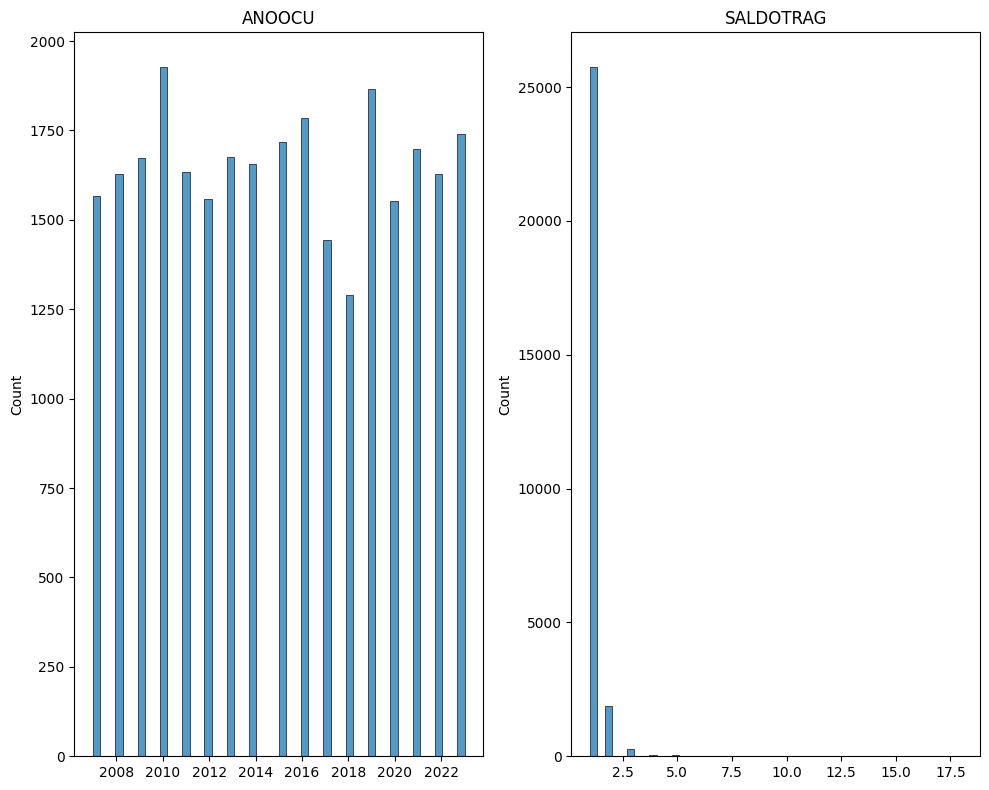

In [33]:
f.plot_numericas(df_num)

Dentro de la cantidad de accidentes, no se puede visualizar un patrón claro pero sí se pueden ver algunas tendencias.

- Los accidentes del 2007 al 2010 fueron en ascenso, sin embargo entre 2011 y 2012 se redujeron. Luego volvieron a ascender hasta el 2016. Entre el 2017 y 2018 la cantidad de accidentes se redujo por debajo de los 1500, que era el tope o rango mínimo que venia mostrando. Sin embargo, para el 2019 se produjo otro pico (al igual que en 2010) y luego en años posteriores se quedaría oscilando entre 1500 y 1750.

In [34]:
df_llena.groupby('ANOOCU')['MESOCU'].count().sort_index(ascending=False)

ANOOCU
2023    1740
2022    1627
2021    1697
2020    1552
2019    1867
2018    1291
2017    1444
2016    1786
2015    1718
2014    1657
2013    1676
2012    1559
2011    1633
2010    1928
2009    1673
2008    1628
2007    1566
Name: MESOCU, dtype: int64

In [35]:
visualizador = sp.Visualizador(df_llena)

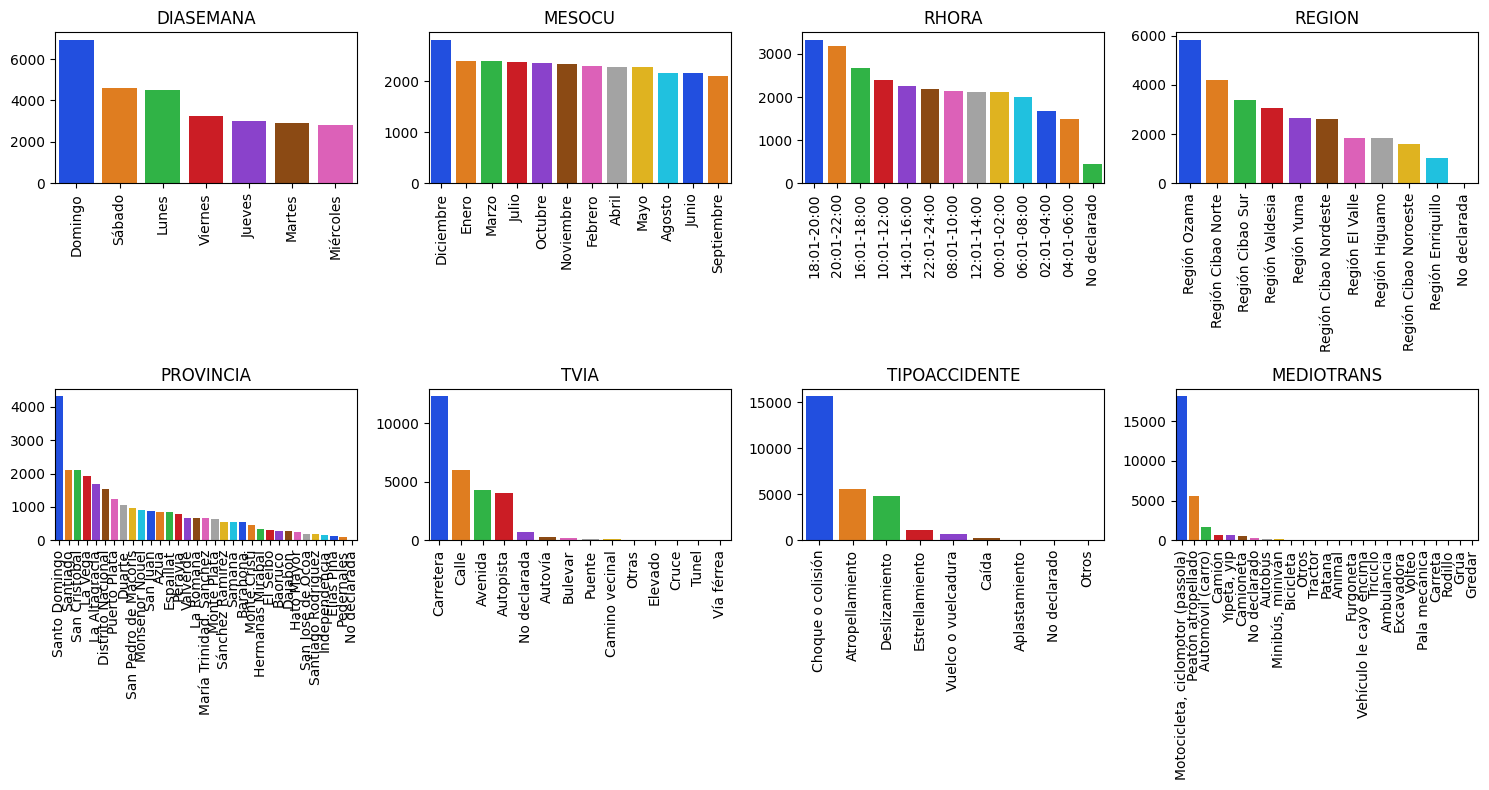

In [36]:
f.plot_categoricas(df_cat)

- Los datos van desde el 2007 hasta el 2023, divididos entre los 12 meses del año
    - El año con más accidentes fue el 2010 con 1928, seguido del 2019 y 2016 en el top 3
    - El mes con más accidentes fue diciembre con 2861, seguido de enero y marzo
    - El día más accidentado fue el domingo, seguido de sábado y lunes
    - Las horas más accidentadas ocurren entre 18-20, 20-22 y 16-18. Lo que demuestra un rango alarmante pero a la vez lógico porque estos suelen sus horarios de mucho movimiento vehicular.
    - Las regiones que tienen más accidentes son Ozama, Cibao Norte y Cibao Sur
    - Las provincias con más accidentes son Santo Domingo, Santiago y San Cristóbal
    - El tipo de vía más accidentada es la Carretera, seguido de la calle y avenida. Aunque la autopista no se queda muy por detrás.
    - El tipo de accidente predomina ser choque, seguido de atropellamiento y deslizamiento.
    - El medio de transporte que predomina en los accidentes es la motocicleta, seguido se encuentra el peatón atropellado para ocupar el tercer lugar el automóvil.

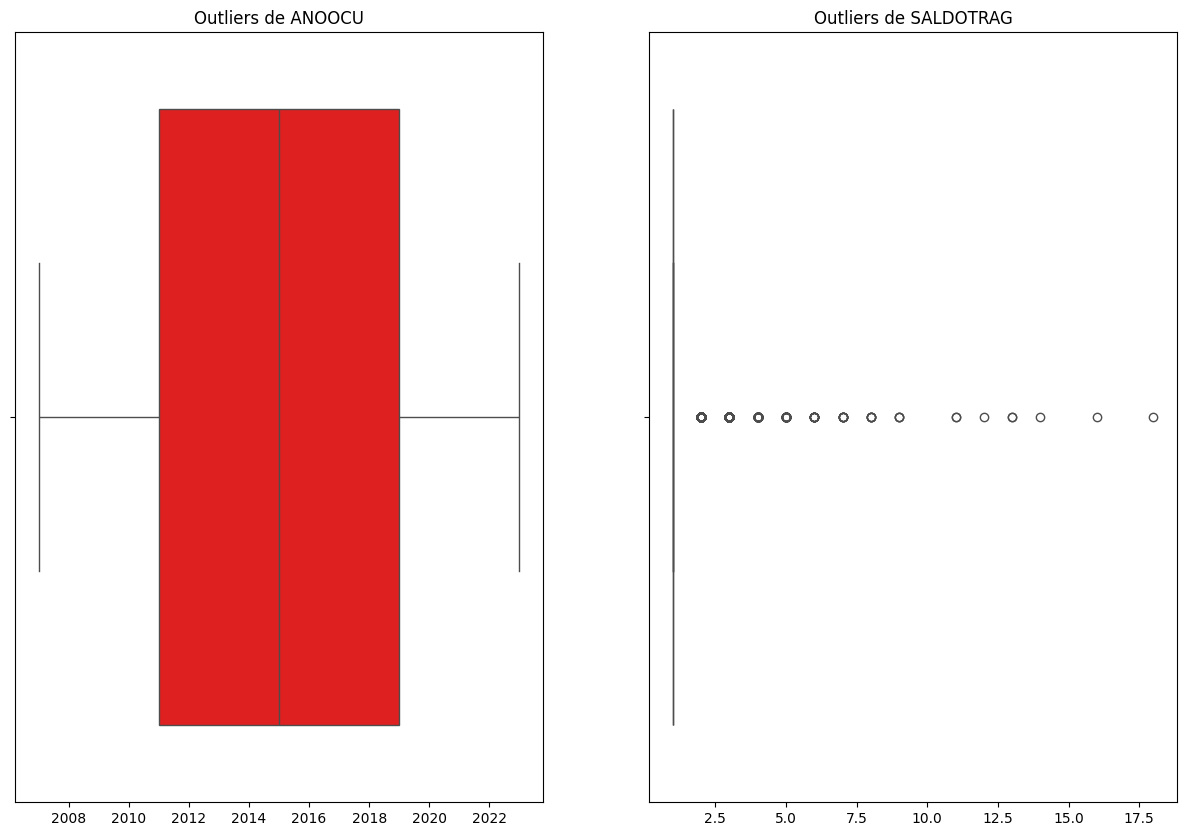

In [37]:
f.detectar_outliers(df_llena)

Podemos ver que como mencioné anteriormente, la gran concentración de saldo trágico está en 1 persona. Los demás los presenta como outliers pero estos siguen siendo datos reales por lo que no serán eliminados.

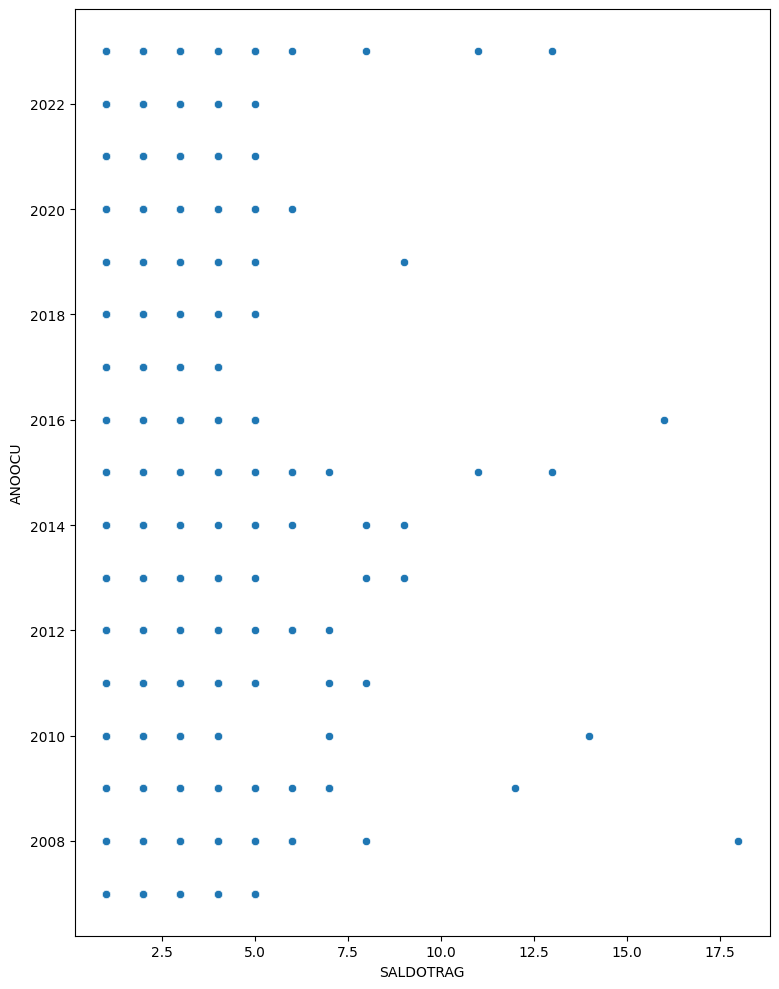

In [38]:
f.relacion_numericas(df_llena, 'ANOOCU')

No existe una relación lineal entre entre el año de ocurrencia y el saldo trágico

## Búsqueda profunda

In [39]:
df_llena.head()

,FECHA,DIASEMANA,MESOCU,ANOOCU,RHORA,REGION,PROVINCIA,TVIA,TIPOACCIDENTE,SALDOTRAG,MEDIOTRANS
0,2007-02-07,Domingo,Febrero,2007,02:01-04:00,Región Ozama,Distrito Nacional,Carretera,Atropellamiento,1,Peatón atropellado
1,2007-02-02,Martes,Febrero,2007,00:01-02:00,Región Ozama,Distrito Nacional,Avenida,Atropellamiento,1,Peatón atropellado
2,2007-02-03,Miércoles,Febrero,2007,00:01-02:00,Región Ozama,Distrito Nacional,Avenida,Atropellamiento,1,Peatón atropellado
3,2007-02-03,Miércoles,Febrero,2007,20:01-22:00,Región Ozama,Distrito Nacional,Avenida,Atropellamiento,1,Peatón atropellado
4,2007-02-05,Viernes,Febrero,2007,18:01-20:00,Región Ozama,Distrito Nacional,Avenida,Atropellamiento,1,Peatón atropellado


In [40]:
df_llena.groupby(['REGION', 'PROVINCIA'])[['TVIA']].count().sort_values(by='TVIA', ascending=False)

,,TVIA
REGION,PROVINCIA,
Región Ozama,Santo Domingo,4320
Región Cibao Norte,Santiago,2120
Región Valdesia,San Cristóbal,2100
Región Cibao Sur,La Vega,1936
Región Yuma,La Altagracia,1683
Región Ozama,Distrito Nacional,1522
Región Cibao Norte,Puerto Plata,1229
Región Cibao Nordeste,Duarte,1058
Región Higuamo,San Pedro de Macorís,963


Vemos como predominan las mismas regiones que vimos en la visualización anterior, destacando provincias que más aportan números al conteo de accidentes.

In [41]:
tabla_pivote_region = df_llena.pivot_table(
    index='REGION',       
    columns='ANOOCU',        
    values='TIPOACCIDENTE',  
    aggfunc='count', # añadimos count porque queremos el conteo por año
)

tabla_pivote_region['Total'] = tabla_pivote_region.sum(axis=1)  # agregamos la columna Total  para hacer la suma
tabla_pivote_region = tabla_pivote_region.sort_values(by='Total', ascending=False)
tabla_pivote_region

ANOOCU,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,Total
REGION,,,,,,,,,,,,,,,,,,
Región Ozama,411.0,458.0,419.0,445.0,385.0,380.0,389.0,321.0,274.0,296.0,244.0,260.0,359.0,293.0,287.0,303.0,318.0,5842.0
Región Cibao Norte,234.0,212.0,264.0,273.0,210.0,205.0,256.0,282.0,311.0,281.0,215.0,200.0,296.0,203.0,260.0,239.0,252.0,4193.0
Región Cibao Sur,148.0,178.0,211.0,243.0,201.0,169.0,188.0,195.0,231.0,224.0,196.0,146.0,246.0,192.0,215.0,195.0,202.0,3380.0
Región Valdesia,176.0,195.0,202.0,219.0,188.0,136.0,153.0,167.0,132.0,194.0,161.0,187.0,204.0,202.0,167.0,172.0,216.0,3071.0
Región Yuma,169.0,158.0,145.0,142.0,136.0,135.0,151.0,144.0,169.0,180.0,132.0,106.0,185.0,137.0,186.0,163.0,203.0,2641.0
Región Cibao Nordeste,122.0,118.0,117.0,174.0,149.0,161.0,168.0,171.0,184.0,191.0,174.0,102.0,165.0,150.0,146.0,157.0,151.0,2600.0
Región El Valle,67.0,68.0,103.0,135.0,112.0,102.0,94.0,102.0,117.0,116.0,114.0,121.0,121.0,99.0,121.0,125.0,119.0,1836.0
Región Higuamo,111.0,130.0,92.0,118.0,98.0,106.0,105.0,97.0,108.0,125.0,97.0,72.0,112.0,116.0,125.0,115.0,103.0,1830.0
Región Cibao Noroeste,68.0,58.0,67.0,93.0,90.0,100.0,110.0,104.0,119.0,117.0,63.0,67.0,109.0,105.0,129.0,100.0,98.0,1597.0


Podemos observar que en las 2 principales provincias (que suceden accidentes) estos números se mantienen por encima de los 200 al año. Destacando que la Region Ozama (la más accidentada) regularmente tiene cifras mayores a 300, incluso 400, al año. En el caso de la Región Cibao Norte, se mantiene entre los 200 y 300 al año aunque en un momento dado, superó el límite de los 300 (año 2015) justo el año en que superó las cifras de la región Ozama.

La Región Cibao Sur también tiene cifras que superan los 200 accidentes al año, pero no con mucha frecuencia. Sus datos se acercan a la región vecina, Cibao Norte.

In [42]:
tabla_pivote_provincia = df_llena.pivot_table(
    index='PROVINCIA', # a diferencia de la anterior, vemos la evolución histórica de los accidentes por provincias
    columns='ANOOCU',         
    values='TIPOACCIDENTE',  
    aggfunc='count',       
)

tabla_pivote_provincia['Total'] = tabla_pivote_provincia.sum(axis=1)  
tabla_pivote_provincia = tabla_pivote_provincia.sort_values(by='Total', ascending=False)
tabla_pivote_provincia

ANOOCU,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,Total
PROVINCIA,,,,,,,,,,,,,,,,,,
Santo Domingo,302.0,343.0,312.0,349.0,290.0,283.0,282.0,215.0,210.0,230.0,185.0,181.0,275.0,221.0,201.0,215.0,226.0,4320.0
Santiago,109.0,98.0,142.0,154.0,95.0,112.0,123.0,133.0,151.0,136.0,113.0,134.0,144.0,114.0,135.0,117.0,110.0,2120.0
San Cristóbal,132.0,150.0,157.0,160.0,133.0,95.0,110.0,116.0,83.0,116.0,103.0,130.0,135.0,142.0,102.0,98.0,138.0,2100.0
La Vega,55.0,76.0,134.0,148.0,125.0,96.0,104.0,121.0,134.0,136.0,113.0,91.0,148.0,114.0,112.0,112.0,117.0,1936.0
La Altagracia,113.0,102.0,85.0,95.0,90.0,90.0,84.0,92.0,106.0,115.0,75.0,74.0,132.0,83.0,114.0,102.0,131.0,1683.0
Distrito Nacional,109.0,115.0,107.0,96.0,95.0,97.0,107.0,106.0,64.0,66.0,59.0,79.0,84.0,72.0,86.0,88.0,92.0,1522.0
Puerto Plata,79.0,76.0,75.0,75.0,66.0,69.0,84.0,83.0,81.0,76.0,49.0,37.0,97.0,54.0,70.0,72.0,86.0,1229.0
Duarte,57.0,52.0,55.0,85.0,58.0,81.0,63.0,61.0,85.0,96.0,68.0,38.0,55.0,55.0,49.0,53.0,47.0,1058.0
San Pedro de Macorís,56.0,72.0,50.0,53.0,63.0,58.0,64.0,60.0,66.0,67.0,52.0,26.0,64.0,47.0,62.0,56.0,47.0,963.0


Históricamente, la provincia de Santo Domingo es la que más accidentes tiene y así lo muestran los datos. Vemos que en los primeros años las cifras eran alarmantes, pero a partir del 2010 estas fueron en descenso hasta el 2018 llegando a ubicarse por debajo de 200 accidentes al año. Sin embargo, el año siguiente (2019) estas cifras experimentaron un aumento considerable para luego empezar a reducirse colocándose para el 2023 en un número apenas superior a las 200 (226).

Luego, entre Santiago y San Cristóbal se pelean con números similares ya que en algunos años se turnan el segundo lugar. Aunque al principio San Cristóbal tenía mayor prevalencia en accidentes que Santiago, esta última empezaría a superarla en frecuencia de accidentes a partir del 2012.

Cerca están La Vega y La Altagracia que se acercan pero quedando por debajo de los 2000 accidentes en total. Aunque los números de La Vega fueron en aumento durante los primeros años del registro, se han mantenido por debajo de los 150. La Altagracia, quien le sigue, tiene años por debajo de los 100 accidentes en diversas ocasiones. Sin embargo, en los años más recientes ha superado ese límite (desde el 2021).